In [438]:
import pandas as pd
import numpy as np

from nltk.corpus import stopwords
from gensim.models import Word2Vec, Doc2Vec, TfidfModel
from gensim.models.phrases import Phraser, Phrases

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt

In [439]:
stopword_set = stopwords.words('english')

In [440]:
stopword_set = stopword_set + ["need", "goal", "include", "looking", "seeking"]

In [441]:
df = pd.read_csv("Raw_Data/jobs.csv")
df.head()

,company,description,job_cat,loc,location,position,position_low
0,Loftium,About the role\nMachine learning is core to ou...,machine learning,"Seattle, WA","Seattle, Washington, United States",Machine Learning Engineer,NaN
1,Zume Inc.,Who We Are\n\nZume is on a quest to be the mos...,machine learning,"Seattle, WA","Seattle, WA, US",Machine Learning Engineer - Platform,NaN
2,"TRC Staffing Services, Inc.",The goal is to lead the processes from infrast...,machine learning,"Seattle, WA","Seattle, WA, US",Machine Learning Engineer,NaN
3,bidco,We are looking for a Machine Learning Engineer...,machine learning,"Seattle, WA","Seattle, WA, US",Machine Learning Engineer,NaN
4,Compass /,Engineering\n\nMachine Learning Engineer\n\nSe...,machine learning,"Seattle, WA","Seattle, WA, US",Machine Learning Engineer,NaN


In [442]:
descriptions = df["description"]

In [443]:
def cleaner(text, stopwords=stopwords.words('english'), symbols = "?&()*%$#@.!:;^,"):
    text = text.replace("\n", " ").replace("*", "").strip().strip("\n").replace("-", "_")
    for symbol in symbols:
        text = text.replace(symbol, "")
    text = text.lower()
    new_text = []
    for word in text.split(" "):
        if word in stopwords or word == ' ' or word == '':
            continue
        else:
            new_text.append(word)
    return new_text

In [444]:
descriptions = [cleaner(d, stopwords=stopword_set) for d in descriptions]

In [445]:
df['cleaned_descriptions'] = descriptions

In [446]:
bigram = Phrases(sentences = descriptions, min_count=1, threshold=1)

In [447]:
phrased_descriptions = [bigram[d] for d in descriptions]

In [448]:
df['phrased_descriptions'] = phrased_descriptions

In [449]:
df.head()

,company,description,job_cat,loc,location,position,position_low,cleaned_descriptions,phrased_descriptions
0,Loftium,About the role\nMachine learning is core to ou...,machine learning,"Seattle, WA","Seattle, Washington, United States",Machine Learning Engineer,NaN,"[role, machine, learning, core, business, driv...","[role, machine_learning, core_business, drivin..."
1,Zume Inc.,Who We Are\n\nZume is on a quest to be the mos...,machine learning,"Seattle, WA","Seattle, WA, US",Machine Learning Engineer - Platform,NaN,"[zume, quest, powerful, source, health, well_b...","[zume, quest_powerful, source, health_well_bei..."
2,"TRC Staffing Services, Inc.",The goal is to lead the processes from infrast...,machine learning,"Seattle, WA","Seattle, WA, US",Machine Learning Engineer,NaN,"[lead, processes, infrastructure, config, data...","[lead, processes, infrastructure, config, data..."
3,bidco,We are looking for a Machine Learning Engineer...,machine learning,"Seattle, WA","Seattle, WA, US",Machine Learning Engineer,NaN,"[machine, learning, engineer, help, us, create...","[machine_learning, engineer_help, us_create, a..."
4,Compass /,Engineering\n\nMachine Learning Engineer\n\nSe...,machine learning,"Seattle, WA","Seattle, WA, US",Machine Learning Engineer,NaN,"[engineering, machine, learning, engineer, sea...","[engineering, machine_learning, engineer_seatt..."


In [450]:
df.description[0]

"About the role\nMachine learning is core to our business, driving everything from our long-term and short-term rental income prediction algorithms to our revenue optimization algorithms and our properties acquisition pipeline. We're looking for a talented, experienced ML engineer to help us scale quickly, smartly and nimbly. This role offers a unique opportunity to join an amazing team and grow your career as quickly as Loftium scales.This role reports to our Head of Machine Learning.\n\nResponsibilities:\nBuild machine learning products that help drive our business\nMake thoughtful architectural decisions with limited information translating business requirements into machine learning products\nCommunicate decision rationales, formulating project plans and delivering results\nAutomating model comparison and feature selection to optimize performance\nShipping code to our staging and production environments multiple times a day\nBuilding data pipelines that allow us to improve our mach

In [451]:
df.cleaned_descriptions[0]

['role',
 'machine',
 'learning',
 'core',
 'business',
 'driving',
 'everything',
 'long_term',
 'short_term',
 'rental',
 'income',
 'prediction',
 'algorithms',
 'revenue',
 'optimization',
 'algorithms',
 'properties',
 'acquisition',
 'pipeline',
 "we're",
 'talented',
 'experienced',
 'ml',
 'engineer',
 'help',
 'us',
 'scale',
 'quickly',
 'smartly',
 'nimbly',
 'role',
 'offers',
 'unique',
 'opportunity',
 'join',
 'amazing',
 'team',
 'grow',
 'career',
 'quickly',
 'loftium',
 'scalesthis',
 'role',
 'reports',
 'head',
 'machine',
 'learning',
 'responsibilities',
 'build',
 'machine',
 'learning',
 'products',
 'help',
 'drive',
 'business',
 'make',
 'thoughtful',
 'architectural',
 'decisions',
 'limited',
 'information',
 'translating',
 'business',
 'requirements',
 'machine',
 'learning',
 'products',
 'communicate',
 'decision',
 'rationales',
 'formulating',
 'project',
 'plans',
 'delivering',
 'results',
 'automating',
 'model',
 'comparison',
 'feature',
 'selec

In [452]:
df.phrased_descriptions[0]

['role',
 'machine_learning',
 'core_business',
 'driving',
 'everything',
 'long_term_short_term',
 'rental',
 'income',
 'prediction_algorithms',
 'revenue_optimization',
 'algorithms',
 'properties',
 'acquisition',
 'pipeline',
 "we're_talented",
 'experienced',
 'ml_engineer',
 'help_us',
 'scale',
 'quickly',
 'smartly',
 'nimbly',
 'role_offers',
 'unique_opportunity',
 'join_amazing',
 'team',
 'grow_career',
 'quickly',
 'loftium',
 'scalesthis',
 'role_reports',
 'head',
 'machine_learning',
 'responsibilities_build',
 'machine_learning',
 'products_help',
 'drive_business',
 'make',
 'thoughtful',
 'architectural_decisions',
 'limited',
 'information',
 'translating_business',
 'requirements',
 'machine_learning',
 'products',
 'communicate',
 'decision',
 'rationales',
 'formulating',
 'project_plans',
 'delivering_results',
 'automating',
 'model',
 'comparison',
 'feature_selection',
 'optimize_performance',
 'shipping_code',
 'staging',
 'production_environments',
 'mult

In [453]:
df["cleaned_phrased_descriptions"] = [' '.join(d) for d in df.phrased_descriptions]

In [454]:
df.head()

,company,description,job_cat,loc,location,position,position_low,cleaned_descriptions,phrased_descriptions,cleaned_phrased_descriptions
0,Loftium,About the role\nMachine learning is core to ou...,machine learning,"Seattle, WA","Seattle, Washington, United States",Machine Learning Engineer,NaN,"[role, machine, learning, core, business, driv...","[role, machine_learning, core_business, drivin...",role machine_learning core_business driving ev...
1,Zume Inc.,Who We Are\n\nZume is on a quest to be the mos...,machine learning,"Seattle, WA","Seattle, WA, US",Machine Learning Engineer - Platform,NaN,"[zume, quest, powerful, source, health, well_b...","[zume, quest_powerful, source, health_well_bei...",zume quest_powerful source health_well_being w...
2,"TRC Staffing Services, Inc.",The goal is to lead the processes from infrast...,machine learning,"Seattle, WA","Seattle, WA, US",Machine Learning Engineer,NaN,"[lead, processes, infrastructure, config, data...","[lead, processes, infrastructure, config, data...",lead processes infrastructure config data_coll...
3,bidco,We are looking for a Machine Learning Engineer...,machine learning,"Seattle, WA","Seattle, WA, US",Machine Learning Engineer,NaN,"[machine, learning, engineer, help, us, create...","[machine_learning, engineer_help, us_create, a...",machine_learning engineer_help us_create artif...
4,Compass /,Engineering\n\nMachine Learning Engineer\n\nSe...,machine learning,"Seattle, WA","Seattle, WA, US",Machine Learning Engineer,NaN,"[engineering, machine, learning, engineer, sea...","[engineering, machine_learning, engineer_seatt...",engineering machine_learning engineer_seattle ...


In [455]:
df.cleaned_phrased_descriptions[0]

"role machine_learning core_business driving everything long_term_short_term rental income prediction_algorithms revenue_optimization algorithms properties acquisition pipeline we're_talented experienced ml_engineer help_us scale quickly smartly nimbly role_offers unique_opportunity join_amazing team grow_career quickly loftium scalesthis role_reports head machine_learning responsibilities_build machine_learning products_help drive_business make thoughtful architectural_decisions limited information translating_business requirements machine_learning products communicate decision rationales formulating project_plans delivering_results automating model comparison feature_selection optimize_performance shipping_code staging production_environments multiple_times day building data_pipelines allow_us improve machine_learning products_services design_deploy efficient data services stores we're_5+ years_experience leveraging_machine learning solve_complex business_problems you’re adaptable th

In [456]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [457]:
y.value_counts()

data scientist    1301
data analyst      1155
Name: job_cat, dtype: int64

In [458]:
df_ds_da = df[(df['job_cat'] == 'data scientist') | (df['job_cat'] == 'data analyst')]

In [459]:
X.isnull().sum()

0

In [460]:
# remove words like data_scientist, data_analyst
df_ds_da.loc[:, 'cleaned_phrased_descriptions'] = \
        df_ds_da.loc[:, 'cleaned_phrased_descriptions'].str.replace('data_scientist', '')
df_ds_da.loc[:, 'cleaned_phrased_descriptions'] = \
    df_ds_da.loc[:, 'cleaned_phrased_descriptions'].str.replace('data_scientists', '')
df_ds_da.loc[:, 'cleaned_phrased_descriptions'] = \
    df_ds_da.loc[:,'cleaned_phrased_descriptions'].str.replace('data_analyst', '')
df_ds_da.loc[:, 'cleaned_phrased_descriptions'] = \
    df_ds_da.loc[:, 'cleaned_phrased_descriptions'].str.replace('data_science', '')
df_ds_da.loc['cleaned_phrased_descriptions'] = \
    df_ds_da.loc[:, 'cleaned_phrased_descriptions'].str.replace('data_analysis', '')
df_ds_da.loc[:,'cleaned_phrased_descriptions'] = \
    df_ds_da.loc[:, 'cleaned_phrased_descriptions'].str.replace('analyst', '')
df_ds_da.loc['cleaned_phrased_descriptions'] = \
    df_ds_da.loc[:, 'cleaned_phrased_descriptions'].str.replace('data_science', '')
df_ds_da.loc[:,'cleaned_phrased_descriptions'] = \
    df_ds_da.loc[:, 'cleaned_phrased_descriptions'].str.replace('_machine', '')
df_ds_da.loc[:,'cleaned_phrased_descriptions'] = \
    df_ds_da.loc[:, 'cleaned_phrased_descriptions'].str.replace('science', '')
df_ds_da.loc[:,'cleaned_phrased_descriptions'] = \
    df_ds_da.loc[:, 'cleaned_phrased_descriptions'].str.replace('excel', 'microsoft_excel')
df_ds_da.loc[:,'cleaned_phrased_descriptions'] = \
    df_ds_da.loc[:, 'cleaned_phrased_descriptions'].str.replace('scientists', '')
df_ds_da.loc[:,'cleaned_phrased_descriptions'] = \
    df_ds_da.loc[:, 'cleaned_phrased_descriptions'].str.replace('scientist', '')
df_ds_da.loc[:,'cleaned_phrased_descriptions'] = \
    df_ds_da.loc[:, 'cleaned_phrased_descriptions'].str.replace('learning', '')
df_ds_da.loc[:,'cleaned_phrased_descriptions'] = \
    df_ds_da.loc[:, 'cleaned_phrased_descriptions'].str.replace('data', '')
df_ds_da.loc[:,'cleaned_phrased_descriptions'] = \
    df_ds_da.loc[:, 'cleaned_phrased_descriptions'].str.replace('_techniques', 'techniques')
df_ds_da.loc[:,'cleaned_phrased_descriptions'] = \
    df_ds_da.loc[:, 'cleaned_phrased_descriptions'].str.replace('you', '')

/Users/jeffreyherman/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value
/Users/jeffreyherman/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/jeffreyherman/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.

In [461]:
df_ds_da.isnull().sum()

company                            1
description                        1
job_cat                            1
loc                                1
location                           1
position                           1
position_low                    2151
cleaned_descriptions               1
phrased_descriptions               1
cleaned_phrased_descriptions       1
dtype: int64

In [462]:
df_ds_da.dropna(subset = ['company'], axis = 0, inplace = True)

/Users/jeffreyherman/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [463]:
X = df_ds_da.cleaned_phrased_descriptions
y = df_ds_da.job_cat

In [464]:
df_ds_da.head()

,company,description,job_cat,loc,location,position,position_low,cleaned_descriptions,phrased_descriptions,cleaned_phrased_descriptions
38,Institute for Systems Biology,The Hadlock lab at the Institute for Systems B...,data scientist,"Seattle, WA","Seattle, WA, US",Software Engineer/Data Scientist,NaN,"[hadlock, lab, institute, systems, biology, is...","[hadlock, lab, institute, systems_biology, isb...",hadlock lab institute systems_biology isb soft...
46,"LanceSoft, Inc.",Responsibilities:\n You will identify customer...,data scientist,"Seattle, WA","Bellevue, Washington",Data Scientist,NaN,"[responsibilities, identify, customer, behavio...","[responsibilities_identify, customer_behavior,...",responsibilities_identify customer_behavior in...
47,Alaska Airlines,What We're About\n\nWe're creating an airline ...,data scientist,"Seattle, WA","Seattle, WA, US",Data Scientist,NaN,"[we're, we're, creating, airline, people, love...","[we're_we're, creating, airline, people_love, ...",we're_we're creating airline people_love begin...
48,Google,Note: By applying to this position your applic...,data scientist,"Seattle, WA","Seattle, WA, US","Data Scientist, Engineering",NaN,"[note, applying, position, application, automa...","[note_applying, position_application, automati...",note_applying position_application automatical...
49,ASSURANCE,About Assurance\n\nAt Assurance we are disrupt...,data scientist,"Seattle, WA","Bellevue, WA, US",Data Scientist,NaN,"[assurance, assurance, disrupting, antiquated,...","[assurance_assurance, disrupting_antiquated, i...",assurance_assurance disrupting_antiquated inef...


In [465]:
tfidf = TfidfVectorizer()

In [466]:
X_t = tfidf.fit_transform(X)

In [467]:
X_t.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [468]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [469]:
xtrain, xtest, ytrain, ytest = train_test_split(X_t.toarray(), y, test_size=0.20)

In [470]:
clf = RandomForestClassifier()

In [471]:
clf.fit(xtrain, ytrain)

/Users/jeffreyherman/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [472]:
clf.score(xtrain, ytrain)

0.9964358452138493

In [473]:
clf.score(xtest, ytest)

0.8638211382113821

In [482]:
top_10 = clf.feature_importances_.argsort()[-50:]

In [483]:
for index in top_10:
    print(tfidf.get_feature_names()[index])

administration
tableau_looker
quantitative_field
products
senior_
develop
_algorithms
team_environment
statistical_models
_analysis
computing
nlp
computer_
advanced_analytics
methods
building
fast_paced
model
solve_complex
ai
amounts_
cutting_edge
statisticaltechniques
business_intelligence
predictive_models
experience
_governance
reporting
statistical
process_improvement
business_problems
modeling
project
spark
deep_
ad_hoc
phd
models
microsoft_excel
tableau
software_engineering
open_source
language_processing
natural_language
big_
algorithms
operations_research
statistical_modeling
reports
machine_


In [374]:
sorted(clf.feature_importances_)[-10:]

[0.004616908136643719,
 0.004702561754439556,
 0.004746550121920277,
 0.004836229362427213,
 0.00542308570433093,
 0.005482933175155221,
 0.005488976412152274,
 0.00901440856866958,
 0.0132654787592274,
 0.056196853289518976]

In [476]:
da_desc = df[(df['job_cat'] == 'data analyst')]['cleaned_phrased_descriptions']
da_freq = da_desc.str.split(expand=True).stack().value_counts()

In [480]:
da_freq['microsoft_excel']

57

In [478]:
ds_desc = df[(df['job_cat'] == 'data scientist')]['cleaned_phrased_descriptions']
ds_freq = ds_desc.str.split(expand=True).stack().value_counts()

In [481]:
ds_freq['microsoft_excel']

5

In [354]:
ds_desc[46]

'responsibilities identify customer_behavior insights, traveler pain_points business_opportunities product,_engineering, marketing design_teams collaboratively_build best_class site customers_around globe apply_expertise quantitative_analysis, predictive_modeling, data_mining, presentation data influence improvements product_design propose_build next_roadmap design_a/b tests optimize_product performance travelers define_key product_metrics monitor, understand_root causes_changes metrics_build models user_behaviors analysis power_production systems_collaborate across_product, marketing_retail analytics_teams spreading standard_methodologies wide adoption author data_pipelines automate_analyses via_sql spark_based etl_framework work building/optimizing models_algorithms enhancing_product performance_customer experience drive enable major initiatives decisions build_long_term value expedia customers actionable analytics, test_learn machine_learning requirement 3+_years hands_on_experience

In [387]:
df.head()

,company,description,job_cat,loc,location,position,position_low,cleaned_descriptions,phrased_descriptions,cleaned_phrased_descriptions
0,Loftium,About the role\nMachine learning is core to ou...,machine learning,"Seattle, WA","Seattle, Washington, United States",Machine Learning Engineer,NaN,"[role, machine, learning, core, business,, dri...","[role, machine_learning, core_business,, drivi...","role machine_learning core_business, driving e..."
1,Zume Inc.,Who We Are\n\nZume is on a quest to be the mos...,machine learning,"Seattle, WA","Seattle, WA, US",Machine Learning Engineer - Platform,NaN,"[zume, quest, powerful, source, health, well_b...","[zume, quest_powerful, source, health_well_bei...",zume quest_powerful source health_well_being w...
2,"TRC Staffing Services, Inc.",The goal is to lead the processes from infrast...,machine learning,"Seattle, WA","Seattle, WA, US",Machine Learning Engineer,NaN,"[lead, processes, infrastructure, config, data...","[lead, processes, infrastructure, config, data...",lead processes infrastructure config data_coll...
3,bidco,We are looking for a Machine Learning Engineer...,machine learning,"Seattle, WA","Seattle, WA, US",Machine Learning Engineer,NaN,"[machine, learning, engineer, help, us, create...","[machine_learning, engineer_help, us_create, a...",machine_learning engineer_help us_create artif...
4,Compass /,Engineering\n\nMachine Learning Engineer\n\nSe...,machine learning,"Seattle, WA","Seattle, WA, US",Machine Learning Engineer,NaN,"[engineering, machine, learning, engineer, sea...","[engineering, machine_learning, engineer_seatt...",engineering machine_learning engineer_seattle ...


In [386]:
import re
s = "107S33M15H\n33M100S\n12M100H33M"
print(re.findall(r"(\d+)M", s))

['33', '33', '12', '33']


In [394]:
mt = df.loc[194, 'description']

In [397]:
mt

"Opportunities with Genoa Healthcare. A career with Genoa Healthcare means you're part of a collaborative effort to serve behavioral health and addiction treatment communities. We do more than just provide medicine: we change lives for the better. People with serious mental or chronic illness – and those who care for them – have moving stories, and at Genoa we become their voice, their partner. Working as part of a coordinated care team, we partner with community-based providers and others to ensure that people with complex health conditions get the right medications and are able to follow their treatment plans. Our personalized services – in-clinic pharmacies, telepsychiatry and medication management – are leading the way to a new level of care. We recently joined OptumRx, a pharmacy care services company that is part of Optum and UnitedHealth Group’s family of businesses. We are part of a leading information and technology-enabled health services business dedicated to making the heal

In [403]:
print(re.findall(r"(\d+) yesfasdfars", mt)[0])

IndexError: list index out of range

In [417]:
df['description'] = df['description'].str.replace('+', '')

In [418]:
def years_experience(text):
    try: 
        years = re.findall(r"(\d+) years", text)[0]
        return years
    except IndexError:
        return np.nan

In [504]:
df['Years_Experience'] = df['description'].map(years_experience)

In [505]:
df.head()

,company,description,job_cat,loc,location,position,position_low,cleaned_descriptions,phrased_descriptions,cleaned_phrased_descriptions,Years_Experience
0,Loftium,About the role\nMachine learning is core to ou...,machine learning,"Seattle, WA","Seattle, Washington, United States",Machine Learning Engineer,NaN,"[role, machine, learning, core, business, driv...","[role, machine_learning, core_business, drivin...",role machine_learning core_business driving ev...,NaN
1,Zume Inc.,Who We Are\n\nZume is on a quest to be the mos...,machine learning,"Seattle, WA","Seattle, WA, US",Machine Learning Engineer - Platform,NaN,"[zume, quest, powerful, source, health, well_b...","[zume, quest_powerful, source, health_well_bei...",zume quest_powerful source health_well_being w...,NaN
2,"TRC Staffing Services, Inc.",The goal is to lead the processes from infrast...,machine learning,"Seattle, WA","Seattle, WA, US",Machine Learning Engineer,NaN,"[lead, processes, infrastructure, config, data...","[lead, processes, infrastructure, config, data...",lead processes infrastructure config data_coll...,NaN
3,bidco,We are looking for a Machine Learning Engineer...,machine learning,"Seattle, WA","Seattle, WA, US",Machine Learning Engineer,NaN,"[machine, learning, engineer, help, us, create...","[machine_learning, engineer_help, us_create, a...",machine_learning engineer_help us_create artif...,NaN
4,Compass /,Engineering\n\nMachine Learning Engineer\n\nSe...,machine learning,"Seattle, WA","Seattle, WA, US",Machine Learning Engineer,NaN,"[engineering, machine, learning, engineer, sea...","[engineering, machine_learning, engineer_seatt...",engineering machine_learning engineer_seattle ...,NaN


In [424]:
df.isnull().sum()

company                            0
description                        0
job_cat                            0
loc                                0
location                           0
position                           0
position_low                    3175
cleaned_descriptions               0
phrased_descriptions               0
cleaned_phrased_descriptions       0
Years_Experience                1234
dtype: int64

In [425]:
df_da = df[df['job_cat'] == 'data analyst']

In [426]:
df_da.shape

(1155, 11)

In [428]:
df_da.isnull().sum()

company                            0
description                        0
job_cat                            0
loc                                0
location                           0
position                           0
position_low                    1005
cleaned_descriptions               0
phrased_descriptions               0
cleaned_phrased_descriptions       0
Years_Experience                 430
dtype: int64

In [431]:
df_da.dropna(subset = ['Years_Experience'], inplace = True)

/Users/jeffreyherman/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [432]:
df_da['Years_Experience'].value_counts()

2      175
3      156
5      150
4       75
1       29
8       26
7       24
6       23
10      16
30       7
15       5
60       4
0        4
70       3
160      3
150      3
75       3
175      3
20       2
25       2
200      2
40       2
12       2
100      1
120      1
165      1
50       1
9        1
48       1
Name: Years_Experience, dtype: int64

In [437]:
df_da.loc[187, 'description']

"Overview\n\nPosition Summary: (MUST BE COMMUTABLE TO KIRKLAND, WA or BAY AREA, CA)\nData Analysts support decision making across Appen's business by organizing, analyzing data and providing insights to internal teams and external clients. As Analyst position levels increase, so will the expectations, scope of responsibilities and impact.\nKey Responsibilities\nConsolidate, cleanse and transform data to prepare for reporting and analyses.\nCreation and measurement of key performance indicators and metrics.\nDesign and prepare periodic and ad hoc reports, presentations, and exploratory analysis that are designed to use raw data to provide key insights to members of the Client Services organization.\nA truth seeker. You ask why, and you question every assumption. You will be asked to probe assumptions, question the status quo, and follow up on unexpected data results.\nWhere necessary, complete additional tasks as assigned.\nRequired Knowledge, Skills And Abilities\nAbility to apply high

In [436]:
df_da[df_da['Years_Experience'] == '1']

,company,description,job_cat,loc,location,position,position_low,cleaned_descriptions,phrased_descriptions,cleaned_phrased_descriptions,Years_Experience
187,Appen,Overview\n\nPosition Summary: (MUST BE COMMUTA...,data analyst,"Seattle, WA","Kirkland, WA, US","Data Analyst - Sunnyvale, CA - Pleasanton, CA ...",NaN,"[overview, position, summary, must, commutable...","[overview_position, summary, must, commutable,...",overview_position summary must commutable kirk...,1
497,"ShipBob, Inc.","Title: Data Analyst\n\nLocation: Chicago, Illi...",data analyst,"Chicago, IL","Chicago, IL, US",Data Analyst,data analyst,"[title, data, analyst, location, chicago,, ill...","[title_data, analyst_location, chicago,_illino...","title_data analyst_location chicago,_illinois ...",1
622,"ShipBob, Inc.","Title: Data Analyst\n\nLocation: Chicago, Illi...",data analyst,"Chicago, IL","Chicago, IL, US",Data Analyst - Chicago,data analyst - chicago,"[title, data, analyst, location, chicago,, ill...","[title_data, analyst_location, chicago,_illino...","title_data analyst_location chicago,_illinois ...",1
629,Jobs @ TheJobNetwork,Save\n\nEducation\nBachelor's Degree\nHigh Sch...,data analyst,"Chicago, IL","Northbrook, IL, US",Healthcare Data Analyst,healthcare data analyst,"[save, education, bachelor's, degree, high, sc...","[save_education, bachelor's_degree, high_schoo...",save_education bachelor's_degree high_school d...,1
646,CVS Health,"Job Description\n\nCVS/Caremark,the Pharmacy B...",data analyst,"Chicago, IL","Northbrook, IL, US",Healthcare Data Analyst,healthcare data analyst,"[job, description, cvs/caremark,the, pharmacy,...","[job_description, cvs/caremark,the_pharmacy, b...","job_description cvs/caremark,the_pharmacy bene...",1
651,Discover Financial Services,"At Discover, be part of a culture where divers...",data analyst,"Chicago, IL","Riverwoods, IL, US",Senior Data Analyst,senior data analyst,"[discover,, part, culture, diversity,, teamwor...","[discover,_part, culture_diversity,, teamwork_...","discover,_part culture_diversity, teamwork_col...",1
660,Boeing,"At Boeing, we are all innovators on a mission ...",data analyst,"Chicago, IL","Chicago, IL, US",Business Process & Data Analyst,business process & data analyst,"[boeing,, innovators, mission, connect,, prote...","[boeing,_innovators, mission_connect,, protect...","boeing,_innovators mission_connect, protect,_e...",1
692,ClearanceJobs,"At Boeing, we are all innovators on a mission ...",data analyst,"Chicago, IL","Chicago, IL, US",Business Process & Data Analyst with Security ...,business process & data analyst with security ...,"[boeing,, innovators, mission, connect,, prote...","[boeing,_innovators, mission_connect,, protect...","boeing,_innovators mission_connect, protect,_e...",1
1053,"FocusKPI, Inc.","FocusKPI, Inc. is looking for a Data Analyst t...",data analyst,"San Francisco, CA","San Francisco, CA, US",Data Analyst,NaN,"[focuskpi,, inc, data, analyst, work, client, ...","[focuskpi,, inc, data_analyst, work, client, s...","focuskpi, inc data_analyst work client san_fra...",1
1104,Bracket,Looking for the right company?\nBracket\nScien...,data analyst,"San Francisco, CA","San Francisco, CA, US",Data Analyst I,NaN,"[right, company, bracket, science, technology,...","[right, company, bracket, science_technology, ...",right company bracket science_technology servi...,1


In [484]:
from wordcloud import WordCloud

In [486]:
# entry level data analyst 
da_2 = df_da[(df_da['Years_Experience'] == '1') | (df_da['Years_Experience'] == '1')]

In [488]:
text_da2 = " ".join(review for review in da_2['cleaned_phrased_descriptions'])

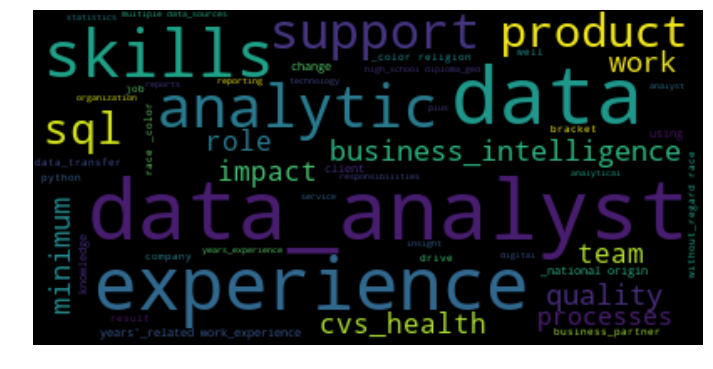

In [495]:
wordcloud = WordCloud(max_font_size=50, max_words=50, background_color="black").generate(text_da2)
fig = plt.figure(figsize = (12, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [496]:
# experienced data analyst 
da_3 = df_da[(df_da['Years_Experience'] == '3') | (df_da['Years_Experience'] == '4') | 
            (df_da['Years_Experience'] == '5')]

In [497]:
text_da3 = " ".join(review for review in da_3['cleaned_phrased_descriptions'])

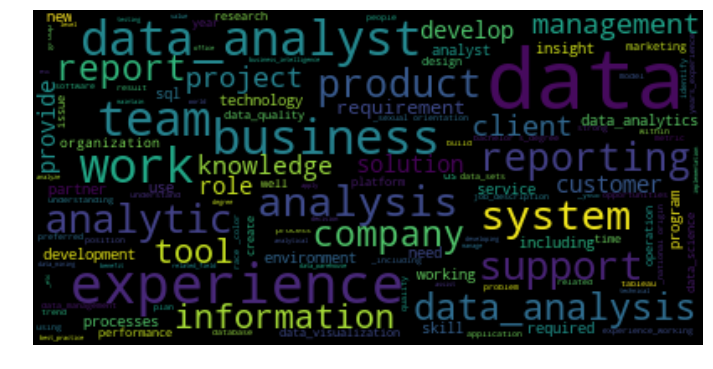

In [498]:
wordcloud = WordCloud(max_font_size=50, max_words=200, background_color="black").generate(text_da3)
fig = plt.figure(figsize = (12, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [509]:
df_ds_ye = df[df['job_cat'] == 'data scientist']

In [513]:
df_ds_ye['Years_Experience'].value_counts()

5      112
3       71
2       58
7       32
4       29
8       15
10      14
6       11
50       8
9        6
17       6
20       5
0        5
30       4
300      3
100      3
200      2
160      2
90       2
75       2
1        2
40       2
25       1
14       1
120      1
230      1
150      1
13       1
12       1
125      1
Name: Years_Experience, dtype: int64

In [514]:
df_ds_el = df_ds_ye[(df_ds_ye['Years_Experience'] == '2')]

In [515]:
text_ds2 = " ".join(review for review in df_ds_el['cleaned_phrased_descriptions'])

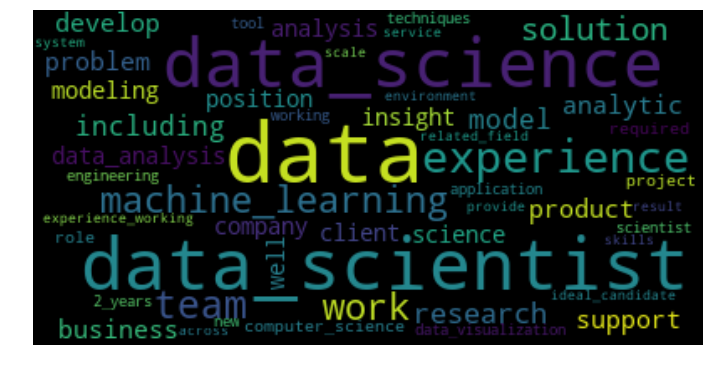

In [516]:
wordcloud = WordCloud(max_font_size=50, max_words=50, background_color="black").generate(text_ds2)
fig = plt.figure(figsize = (12, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [517]:
df_ds_5 = df_ds_ye[(df_ds_ye['Years_Experience'] == '5')]

In [518]:
text_ds5 = " ".join(review for review in df_ds_5['cleaned_phrased_descriptions'])

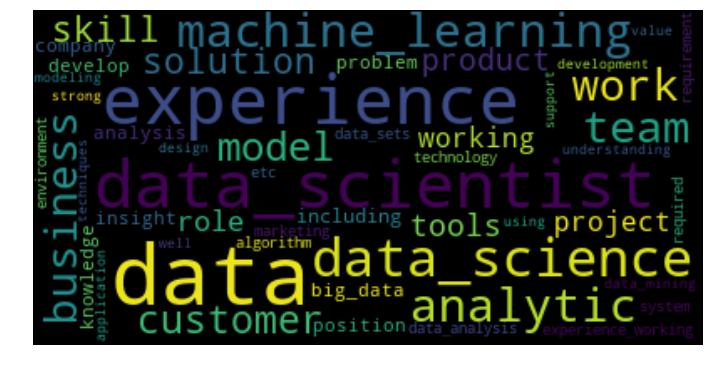

In [519]:
wordcloud = WordCloud(max_font_size=50, max_words=50, background_color="black").generate(text_ds5)
fig = plt.figure(figsize = (12, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [522]:
ds_freq_5 = df_ds_5['cleaned_phrased_descriptions'].str.split(expand=True).stack().value_counts()
ds_freq_2 = df_ds_el['cleaned_phrased_descriptions'].str.split(expand=True).stack().value_counts()

In [524]:
ds_5 = pd.DataFrame(ds_freq_5)
ds_5.columns = ['5']
ds_2 = pd.DataFrame(ds_freq_2)
ds_2.columns = ['2']

In [526]:
ds_5['2'] = ds_2['2']

In [529]:
ds_5['5_percent'] = ds_5['5'] / ds_5['5'].sum()
ds_5['2_percent'] = ds_5['2'] / ds_5['2'].sum()

In [531]:
ds_5['diff'] = np.abs(ds_5['5_percent'] - ds_5['2_percent'])

In [533]:
ds_5.sort_values('diff', ascending = False)

,5,2,5_percent,2_percent,diff
data,278,152.0,0.012208,0.024687,0.012479
data_science,131,95.0,0.005753,0.015430,0.009677
data_scientist,130,86.0,0.005709,0.013968,0.008259
experience,195,97.0,0.008563,0.015754,0.007191
work,82,57.0,0.003601,0.009258,0.005657
machine_learning,124,67.0,0.005445,0.010882,0.005437
solutions,43,41.0,0.001888,0.006659,0.004771
research,33,36.0,0.001449,0.005847,0.004398
2_years,2,26.0,0.000088,0.004223,0.004135
team,79,46.0,0.003469,0.007471,0.004002
